# Exploratory Data Analysis onHoney Production

## Objective:
To visualise how honey production is changed over the years (1998-2012) in the United States.


## Key questions to be answered:
- How has honey production yield changed from 1998 to 2016?

- Over time, what are the major production trends been across the states?

- Are there any patterns that can be observed between total honey production and value of production every year? How has value of production, which in some sense could be tied to demand, changed every year?

## Dataset:
- state: Various states of U.S.

- numcol: Number of honey-producing colonies. Honey producing colonies are the maximum number of colonies from which honey was taken during the year. It is possible to take honey from colonies that did not survive the entire year

- yieldpercol: Honey yield per colony. Unit is pounds

- totalprod: Total production (numcol x yieldpercol). Unit is pounds

- stocks: Refers to stocks held by producers. Unit is pounds

- priceperlb: Refers to average price per pound based on expanded sales. The unit is dollars.

- prodvalue: Value of production (totalprod x priceperlb). The unit is dollars.

- year: Year of production

### Import the necessary packages - pandas, numpy, seaborn, matplotlib.pyplot



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings

### Read in the dataset

In [2]:
honeyprod = pd.read_csv("honeyproduction.csv")

In [3]:
honeyprod.head(10)

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998
5,FL,230000.0,98,22540000.0,4508000.0,0.64,14426000.0,1998
6,GA,75000.0,56,4200000.0,307000.0,0.69,2898000.0,1998
7,HI,8000.0,118,944000.0,66000.0,0.77,727000.0,1998
8,ID,120000.0,50,6000000.0,2220000.0,0.65,3900000.0,1998
9,IL,9000.0,71,639000.0,204000.0,1.19,760000.0,1998


- **Observations**: The dataset looks clean and consistent with description provided in the Data Dictionary.

### Check the shape of the dataset

In [4]:
honeyprod.shape

(626, 8)

### Check the datatype of the variables to make sure that the data is read in properly


In [5]:
honeyprod.dtypes

state           object
numcol         float64
yieldpercol      int64
totalprod      float64
stocks         float64
priceperlb     float64
prodvalue      float64
year             int64
dtype: object

**Observations:**

- state is object data type

- year is integer type currently. Since year is a categorical variable here, let us convert it to category data data type in Python.

- All the other variables are numerical and there for their python data types (float64 and int64) are ok.

In [6]:
honeyprod.year = honeyprod.year.astype('category')
honeyprod.dtypes

state            object
numcol          float64
yieldpercol       int64
totalprod       float64
stocks          float64
priceperlb      float64
prodvalue       float64
year           category
dtype: object

### Let us analyze the quantitative variables in the dataset

In [7]:
honeyprod.describe()

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue
count,626.000000,626.000000,6.260000e+02,6.260000e+02,626.000000,6.260000e+02
mean,60284.345048,62.009585,4.169086e+06,1.318859e+06,1.409569,4.715741e+06
std,91077.087231,19.458754,6.883847e+06,2.272964e+06,0.638599,7.976110e+06
min,2000.000000,19.000000,8.400000e+04,8.000000e+03,0.490000,1.620000e+05
25%,9000.000000,48.000000,4.750000e+05,1.430000e+05,0.932500,7.592500e+05
50%,26000.000000,60.000000,1.533000e+06,4.395000e+05,1.360000,1.841500e+06
75%,63750.000000,74.000000,4.175250e+06,1.489500e+06,1.680000,4.703250e+06
max,510000.000000,136.000000,4.641000e+07,1.380000e+07,4.150000,6.961500e+07


**Observations**
- Number of colonies in every state are spread over a huge range. Ranging from 2000 to 510000.
- The mean numcol is close to the 75% percentile of the data, indicating a right skew.
- As expected, standard deviation of numcol is very high
- yieldpercol - Yield per colony also has huge spread ranging from 19 pounds to 136 pounds.
- Infact, all the variable seem to have a huge range, we will have to investigate furthur if this spread is mainly across different states or varies in the same state over the years.

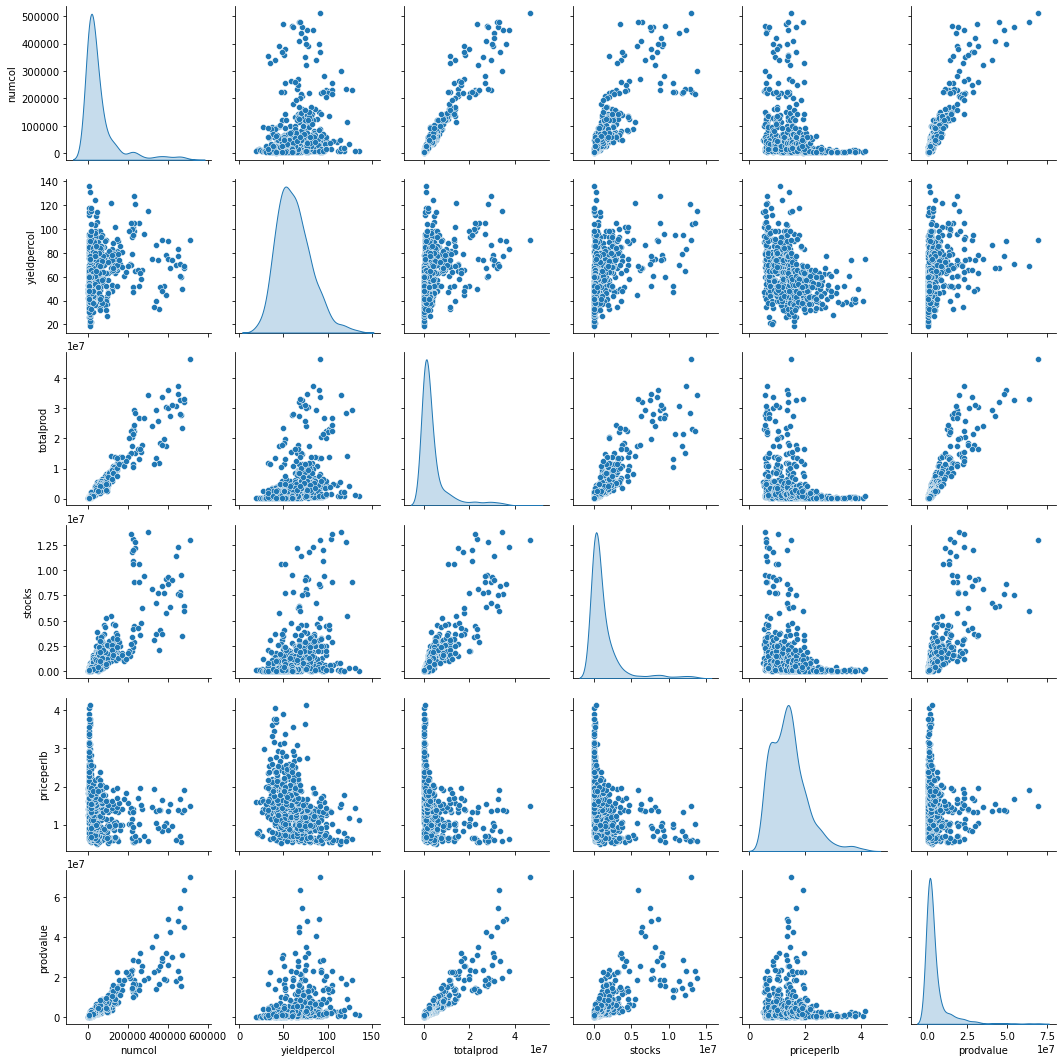

In [8]:
sns.pairplot(honeyprod, diag_kind='kde')

In [9]:
correlation = honeyprod.corr()
correlation

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue
numcol,1.000000,0.243515,0.953594,0.825929,-0.232701,0.912796
yieldpercol,0.243515,1.000000,0.396252,0.367812,-0.358646,0.278977
totalprod,0.953594,0.396252,1.000000,0.878830,-0.264499,0.907236
stocks,0.825929,0.367812,0.878830,1.000000,-0.305867,0.728560
priceperlb,-0.232701,-0.358646,-0.264499,-0.305867,1.000000,-0.089567
prodvalue,0.912796,0.278977,0.907236,0.728560,-0.089567,1.000000


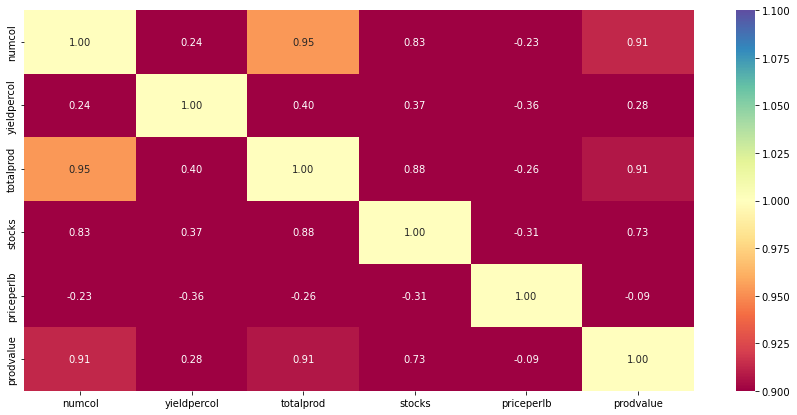

In [13]:
plt.figure(figsize=(15,7))
sns.heatmap(correlation,annot=True, vmin=1,vmax=1,fmt=".2f",cmap="Spectral")
plt.show()

**Observations:**

- Number of colonies have a high positive correlation with total production, stocks and the value of production. As expected, all these values are highly correlated with each other.
- Yield per colony does not have a high correlation with any of the features that we have in our dataset.
- Same is the case with priceperlb.
- Determining the factors influencing per colony yield and price per pound of honey would need furthur investigation.

### Let us now explore the categorical features - state and year

In [18]:
print("Total number of states: ",honeyprod.state.nunique())
print("Total Production Years: ", honeyprod.year.nunique())

Total number of states:  44
Total Production Years:  15


We have honey production data for 44 US states over a span of 15 years, from 1998 to 2012.

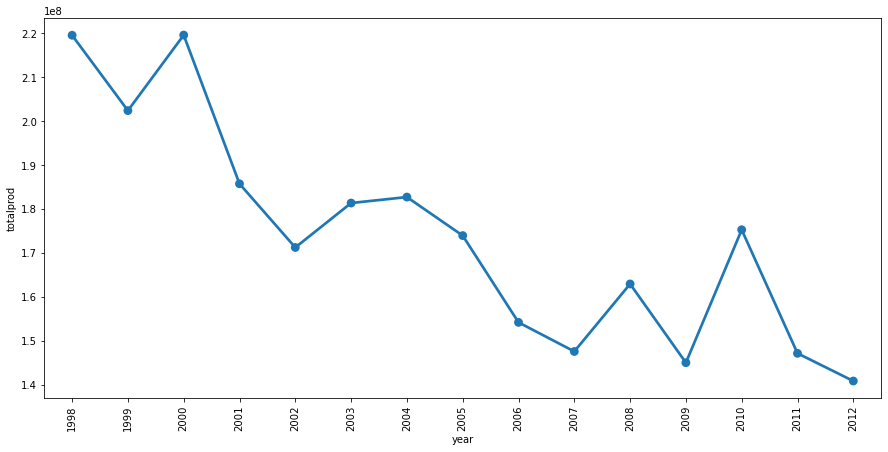

In [23]:
plt.figure(figsize=(15,7))
sns.pointplot(x='year',y='totalprod',data=honeyprod,
             estimator=sum,ci=None)
plt.xticks(rotation=90)
plt.show()

**Observations:**

- The overall honey production in the US has been decresing over the years.
- Total honey production = number of colonies * average yield per colony. Let us check if the honey production is decreasing due to one of these factors or both.

### Variation in the number of colonies over the years

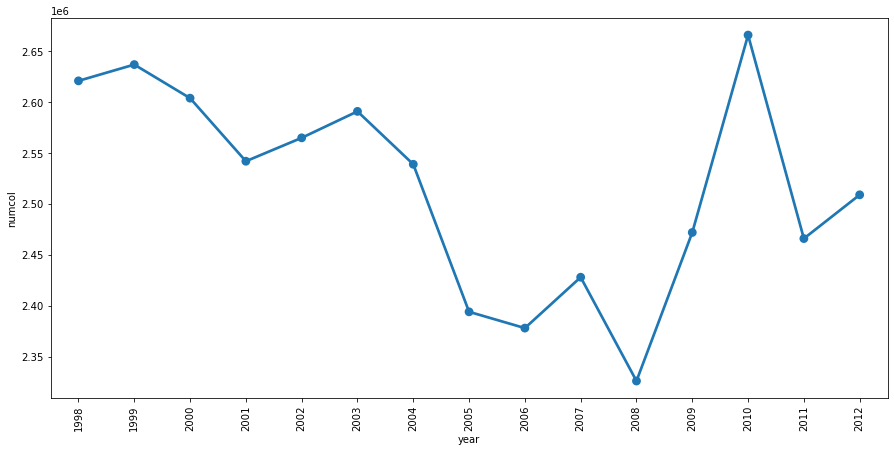

In [34]:
plt.figure(figsize=(15,7))
sns.pointplot(x='year',y='numcol',data=honeyprod,ci=None,
             estimator=sum)
plt.xticks(rotation=90)
plt.show()

**Observations:**
- The number of colonies across the country shows a declining trend from 1998-2008 but has seen an uptick since 2008.
- It is possible that there was some intervension in 2008 that help in increasing the number of honey bee colonies across the country.

### Variation of yield per colony over the years

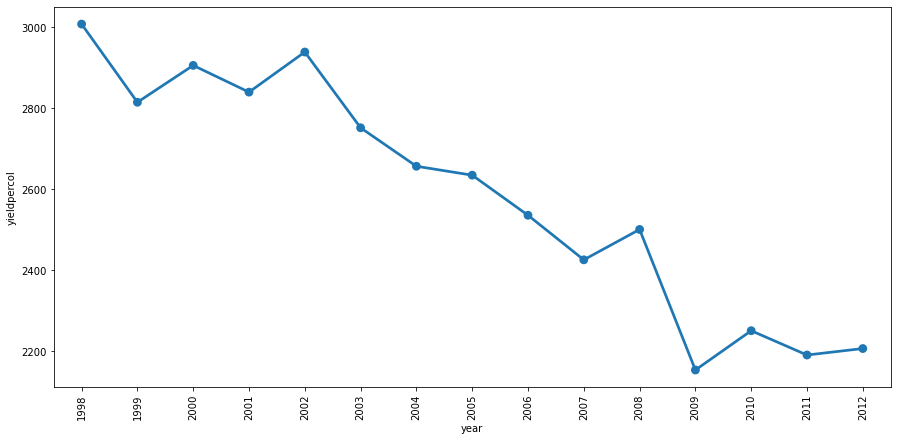

In [37]:
plt.figure(figsize=(15,7))
sns.pointplot(x='year',y='yieldpercol',data=honeyprod,
             estimator=sum,ci=None)
plt.xticks(rotation=90)
plt.show()

**Onservation:**

- In contrast to number of colonies, the yield per colony has been decreasing since 1998.
- This indicates that, it is not the number of colonies that is causing a decline in totalhoney production but the yield per colony.

### Let us loot at the production trend at state level

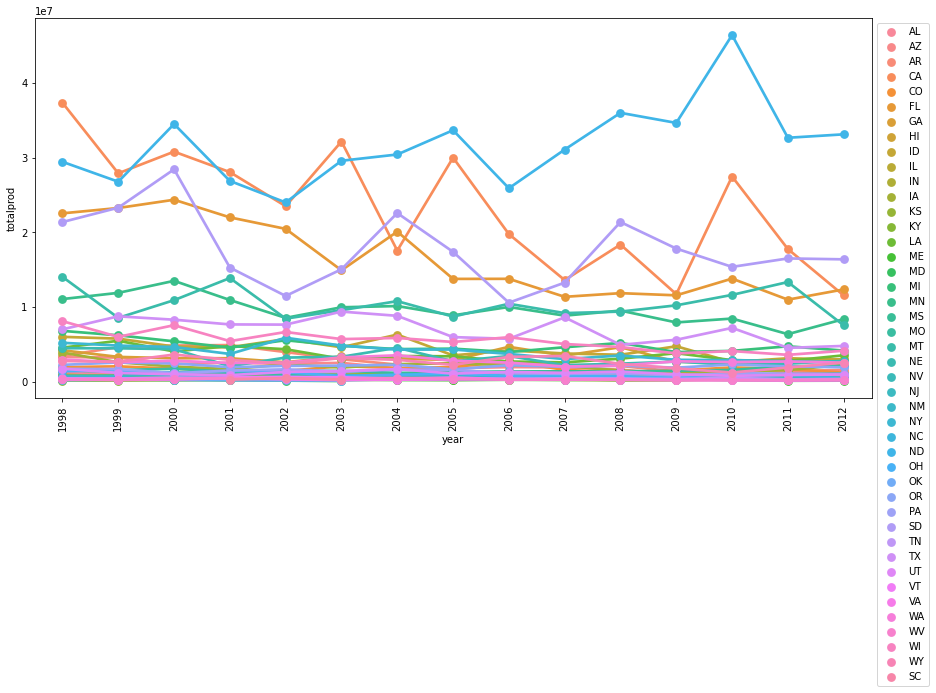

In [39]:
plt.figure(figsize=(15,7))
sns.pointplot(x="year",y="totalprod",data=honeyprod,
            estimator=sum,ci=None, hue='state')
plt.legend(bbox_to_anchor=(1,1))
plt.xticks(rotation=90)
plt.show()

**Observations:**
- There are some states that have much higher productions than the others but this plot is a little hard to read. Let us try plotting each state seperatly for a better understanding.



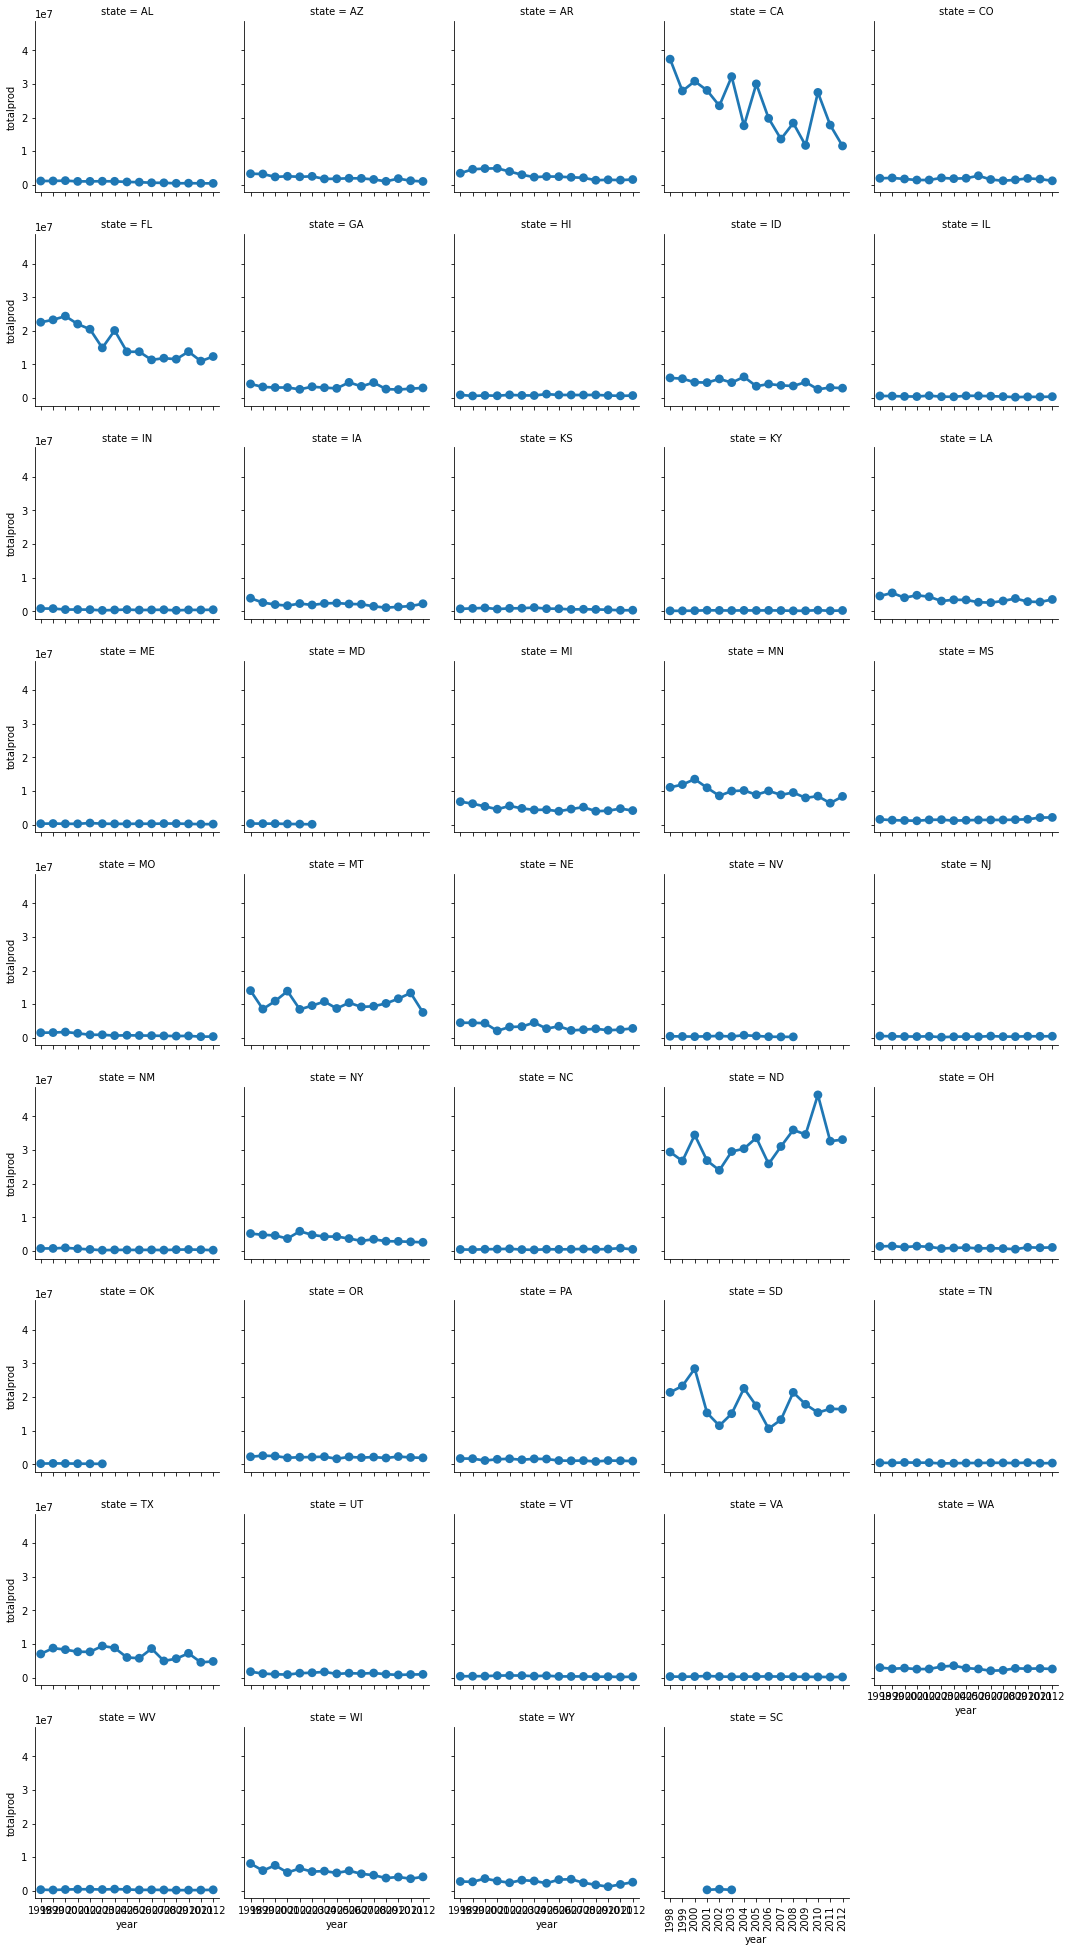

In [42]:
sns.catplot(x='year',y='totalprod',data=honeyprod,
           estimator=sum,col='state', kind='point',
           height=3,col_wrap=5)
plt.xticks(rotation=90)
plt.show()

**Observations:**
- The most prominent honey producing states of US are - California, Florida, North Dakota and South Dakota and Montana
- Unfortunately, the honey production in California has seen a steep decline over the years.
- Florida's total production also has been on a decline.
- South Dakota has more of less maintained its levels of production.
- North Dakota has actually seen an impressive increase in the honey production.



### Let us look at the yearly trend in number of colonies and yield per colony in these 5 states

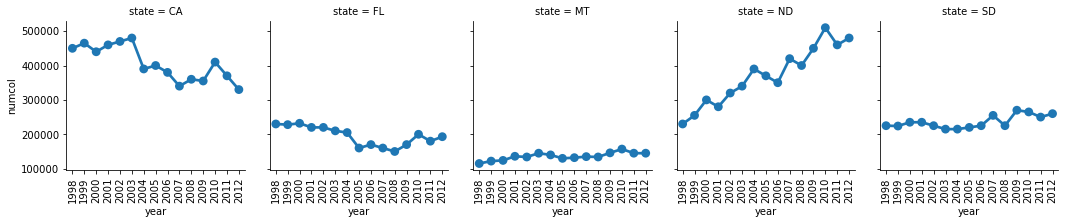

In [48]:
cplot1=sns.catplot(x='year',y='numcol',
                  data=honeyprod[honeyprod['state'].isin(['ND','CA',
                                                        'SD','FL','MT'])],
                  estimator=sum,col='state',kind='point',
                  height=3,col_wrap=5)
cplot1.set_xticklabels(rotation=90)
plt.show()

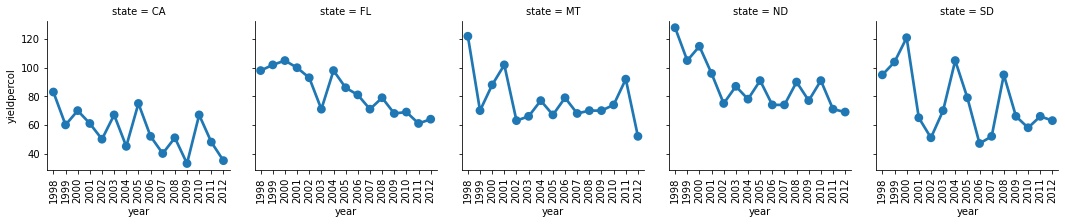

In [49]:
cplot2=sns.catplot(x='year',y='yieldpercol',
                  data=honeyprod[honeyprod['state'].isin(['ND','CA',
                                                        'SD','FL','MT'])],
                  estimator=sum,col='state',kind='point',
                  height=3,col_wrap=5)
cplot2.set_xticklabels(rotation=90)
plt.show()

**Observation:**
- In North Dakota, the number of colonies has increased significantly over the years as compared to the other 4 states
- If we check the yield per colony, it has been in an overall decreasing trend for all the 5 states over the years

### Let us see what effect, the declining production trend has had on the value of production

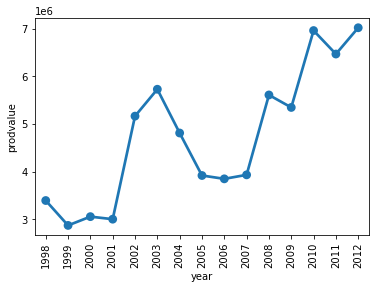

In [50]:
sns.pointplot(x="year", y="prodvalue", data=honeyprod, ci=None)
plt.xticks(rotation=90) # To rotate the x axis labls
plt.show()

**Observations:**
- This is an interesting trend. As the total production has declined over the years, the value of production per pound has increased over time.
- As the supply declined, the demand has added to the value of honey.

### Let us check which of the states have been capitalising on this trend. We can compare the total production with the stocks held by the producers

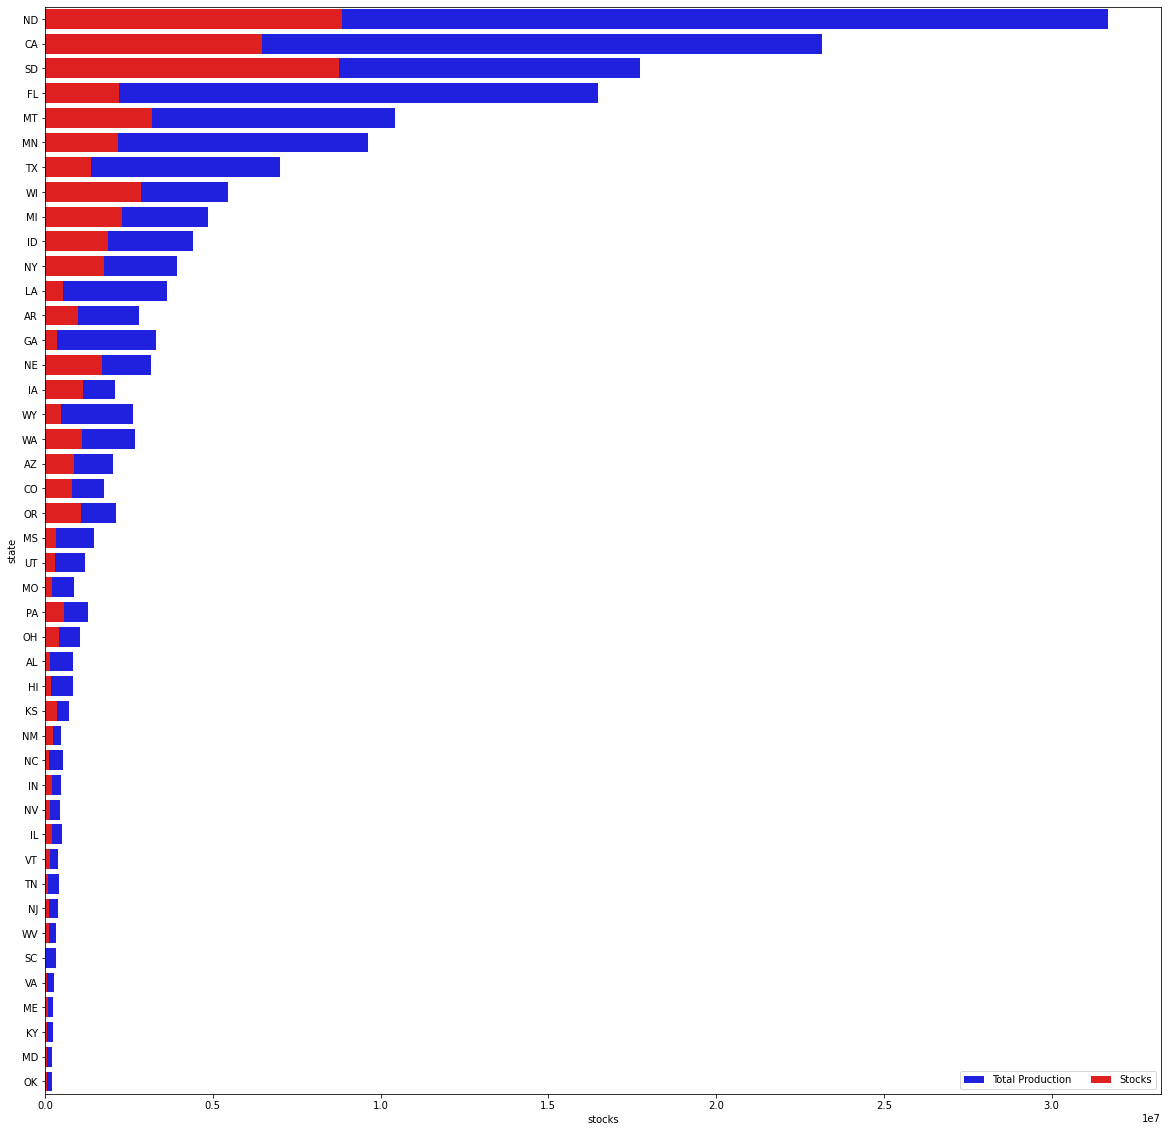

In [52]:
plt.figure(figsize = (20,20)) # To resize the plot

# Plot total production per state
sns.barplot(x="totalprod", y="state", data=honeyprod.sort_values("totalprod", ascending=False),
            label="Total Production", color="b", ci=None)

# Plot stocks per state
sns.barplot(x="stocks", y="state", data=honeyprod.sort_values("totalprod", ascending=False),
            label="Stocks", color="r", ci=None)

# Add a legend  
plt.legend(ncol=2, loc="lower right", frameon=True)
plt.show()

**Observations:**
- North Dakota has been able to sell more honey as compared to South Dakota despite having the highest production value.
- Florida has the highest efficiency among the major honey producing states

### Let us look at the spread of average price of a pound of honey



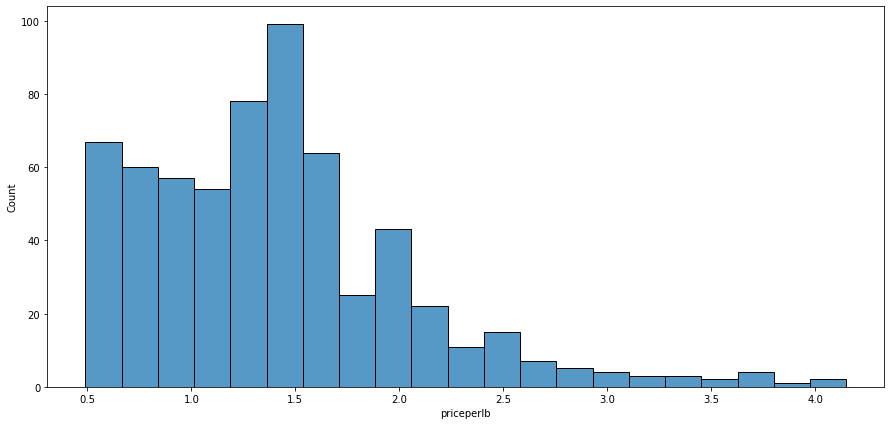

In [53]:
plt.figure(figsize=(15,7))
sns.histplot(honeyprod.priceperlb)
plt.show()

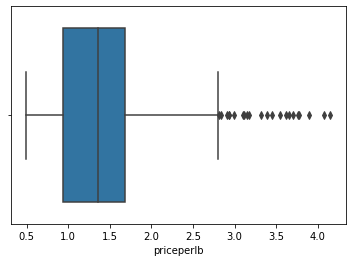

In [54]:
sns.boxplot(data=honeyprod,x='priceperlb')
plt.show()

**Observations:**
- Price per pound of honey has a right skewed distribution with a lot of outliers towards the higher end.
- The median price per pound of honey is 1.5

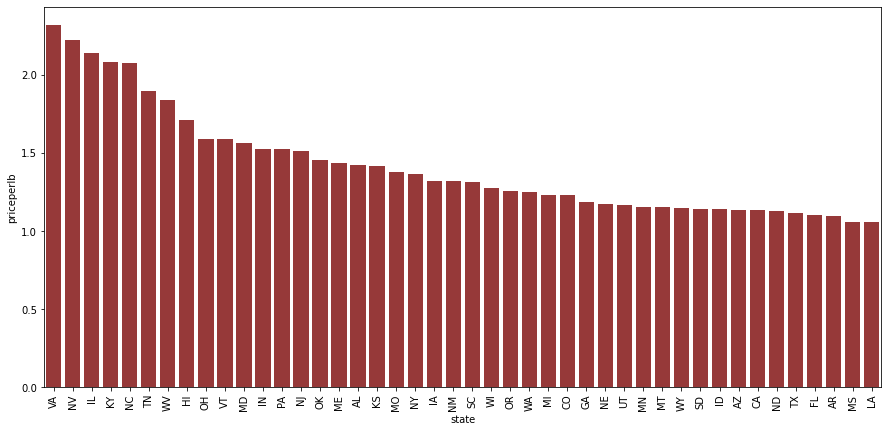

In [57]:
plt.figure(figsize=(15,7))
sns.barplot(data=honeyprod,x='state',y='priceperlb',
           ci=None,color='brown',
           order=honeyprod.groupby('state').priceperlb.mean().sort_values(ascending=False).index)
plt.xticks(rotation=90)
plt.show()

**Observations:**
- Virginia has the highest price per pound of honey.
- The average price per pound of honey in the major honey producing states is towards the lower end.

**Conclusion**

- We can conclude that the total honey production has declined over the years whereas the value of production per pound has increased.
- The reason for the declined honey production is the decrease in the yield per colony over the years.
- The major honey producing states are California, Florida, North Dakota, South Dakota and Montana.
- Among these, Florida has been very efficient in selling honey.